<a href="https://colab.research.google.com/github/TomAmster/Data-Science/blob/master/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats


Mounted at /content/drive


In [0]:
train_path = '/content/drive/Shared drives/DS Workshop/data/train.csv'
train = pd.read_csv(train_path)
bids_path = '/content/drive/Shared drives/DS Workshop/data/bids.csv/bids.csv'
bids = pd.read_csv(bids_path)
test_path= '/content/drive/Shared drives/DS Workshop/data/test.csv'
test = pd.read_csv(test_path)

In [0]:
train.head()
print(train.outcome.value_counts())

0.0    1910
1.0     103
Name: outcome, dtype: int64


In [0]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


# **Data Processing**

### **Process Addresses And Payment Accounts**
1. Create Rare Acccount and Infrequent Account Feautres
2. Create Rare Adddress and Infrequent Address Features
3. One-Hot Encoding of the Categorical Address and Payment Account features
4. Is Payment Account Equals Address

In [0]:
### Strip last 5 digits from payment__account and address
temp_train = train
temp_train.address = temp_train.address.apply(lambda x: x[:-5])
temp_train.payment_account = temp_train.payment_account.apply(lambda x: x[:-5])

## DO THE SAME FOR TEST
temp_test = test
temp_test.address = temp_test.address.apply(lambda x: x[:-5])
temp_test.payment_account = temp_test.payment_account.apply(lambda x: x[:-5])

## Create Feature - is payment account and address are equal
temp_train['payment_account_prefix_same_as_address_prefix'] = temp_train['address']==temp_train['payment_account']
temp_test['payment_account_prefix_same_as_address_prefix'] = temp_test['address']==temp_test['payment_account']

## Create Feature from Address - 
## Convert Rare and infrequent addresses to bins 
## Create One-Hot Encoding of the Rest of the Addresses
temp = temp_train[['bidder_id', 'address']].groupby('address').size().reset_index().sort_values(0, ascending=False)
temp = 	temp.rename(columns = {0:'address_count'})
infrequent_addresses = temp[temp.address_count >= 2][temp.address_count < 6].address.values
rare_addresses = temp[temp.address_count < 2].address.values
temp_train['address'].loc[temp_train.address.isin(rare_addresses)] = 'rare_address'
temp_train['address'].loc[temp_train.address.isin(infrequent_addresses)] = 'infrequent_address'
temp = pd.get_dummies(temp_train[['address']])
temp_train = pd.concat([temp_train, temp], axis=1)
###-------------
temp2 = temp_test[['bidder_id', 'address']].groupby('address').size().reset_index().sort_values(0, ascending=False)
temp2 = temp2.rename(columns = {0:'address_count'})
infrequent_addresses2 = temp2[temp2.address_count >= 2][temp2.address_count < 6].address.values
rare_addresses2= temp2[temp2.address_count < 2].address.values
temp_test['address'].loc[temp_test.address.isin(rare_addresses2)] = 'rare_address'
temp_test['address'].loc[temp_test.address.isin(infrequent_addresses2)] = 'infrequent_address'
temp2 = pd.get_dummies(temp_test[['address']])
temp_test = pd.concat([temp_test, temp2], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [0]:




## Create Feature from Payment Accounts - 
## Convert Rare and infrequent Payment Accounts to bins 
## Create One-Hot Encoding of the Rest of the Payment Accounts
temp = temp_train[['bidder_id', 'payment_account']].groupby('payment_account').size().reset_index().sort_values(0, ascending=False)
temp = temp.rename(columns = {0:'payment_account_count'})
temp2 = temp_test[['bidder_id', 'payment_account']].groupby('payment_account').size().reset_index().sort_values(0, ascending=False)
temp2 = temp2.rename(columns = {0:'payment_account_count'})

infrequent_payment_account = temp[temp.payment_account_count >= 2][temp.payment_account_count < 6].payment_account.values
rare_payment_account = temp[temp.payment_account_count < 2].payment_account.values
temp_train['payment_account'].loc[temp_train.payment_account.isin(rare_payment_account)] = 'rare_account'
temp_train['payment_account'].loc[temp_train.payment_account.isin(infrequent_payment_account)] = 'infrequent_account'	
temp =	pd.get_dummies(temp_train[['payment_account']])
temp_train = pd.concat([temp_train, temp], axis=1)

infrequent_payment_account2 = temp2[temp2.payment_account_count >= 2][temp2.payment_account_count < 6].payment_account.values
rare_payment_account2 = temp2[temp2.payment_account_count < 2].payment_account.values
temp_test['payment_account'].loc[temp_test.payment_account.isin(rare_payment_account2)] = 'rare_account'
temp_test['payment_account'].loc[temp_test.payment_account.isin(infrequent_payment_account2)] = 'infrequent_account'	
temp2 =	pd.get_dummies(temp_test[['payment_account']])
temp_test = pd.concat([temp_test, temp2], axis=1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [0]:
temp_train.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,address_5c9de1da50cc32a29ffd596ae24cd2be,address_794abfcfc9a51569c6415a61a319b352,address_91ea8f05b2be1f7fe36e86e20ea35105,address_a3d2de7675556553a5f08e4c88d2c228,address_b312117de5aeb80a49c753f562c4b2d3,address_c94cf5c3c5205afe0ef14ce669e01565,address_ca8d4b018cb62966eebb2974f5a83b4f,address_e048f5d50823df461686fde13a25d287,address_fb5f20b04f48113f484f73988d44a09a,address_infrequent_address,address_rare_address,payment_account_3e9073fb9219ceb4a1dc9dbb9e1acbe9,payment_account_a3d2de7675556553a5f08e4c88d2c228,payment_account_c9ef8f9c82a24602bca4f1fc4e69fd61,payment_account_infrequent_account,payment_account_rare_account
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228,rare_address,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c228,rare_address,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,rare_account,rare_address,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c228,2a96c3ce94b3be921e0296097b88b56a,0.0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# **Features Extraction** 


**Merge Train and Bids Data to Start Feature Extraction**

In [0]:
bid = pd.merge(temp_train, bids, on='bidder_id', how='left')
data_test = pd.merge(temp_test,bids,on='bidder_id', how='left')
data = bid
data.head(10)

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,address_5c9de1da50cc32a29ffd596ae24cd2be,address_794abfcfc9a51569c6415a61a319b352,address_91ea8f05b2be1f7fe36e86e20ea35105,address_a3d2de7675556553a5f08e4c88d2c228,address_b312117de5aeb80a49c753f562c4b2d3,address_c94cf5c3c5205afe0ef14ce669e01565,address_ca8d4b018cb62966eebb2974f5a83b4f,address_e048f5d50823df461686fde13a25d287,address_fb5f20b04f48113f484f73988d44a09a,address_infrequent_address,address_rare_address,payment_account_3e9073fb9219ceb4a1dc9dbb9e1acbe9,payment_account_a3d2de7675556553a5f08e4c88d2c228,payment_account_c9ef8f9c82a24602bca4f1fc4e69fd61,payment_account_infrequent_account,payment_account_rare_account,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3
5,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,666164.0,1m5t8,home goods,phone35,9.763163e+15,ke,192.145.217.243,vasstdc27m7nks3
6,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,700546.0,0xo1d,home goods,phone4,9.763386e+15,et,223.233.166.93,vasstdc27m7nks3
7,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,926676.0,pfl78,home goods,phone195,9.764267e+15,ke,190.63.186.68,vasstdc27m7nks3
8,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,960606.0,xs8rq,home goods,phone4,9.764392e+15,ke,17.72.96.225,vasstdc27m7nks3
9,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1023806.0,wzwhk,home goods,phone79,9.764658e+15,ng,209.80.85.101,vasstdc27m7nks3


In [0]:
## Create One-Hot Encoding for Merchandise
a = data.groupby('bidder_id').first().reset_index()
b = pd.get_dummies(a['merchandise'], columns='merchandise')
data = pd.concat([data, b], axis=1)
data.head()

a = data_test.groupby('bidder_id').first().reset_index()
b = pd.get_dummies(a['merchandise'], columns='merchandise')
data_test= pd.concat([data_test, b], axis=1)




##  **Basic Count Features**

5.   Bids Count  Per User
6.   Auction Count Per User
7.   Merchandise Count Per User
8.   Device Count Per User
9.   Country Count Per User
10.   IP Count Per User
11.   URL Count Per User
12.   Average Number of Bid Per Auction
13.  Average Number of Bids Per Device
14.  Average Number of Bids Per URL
15.  Average Number of Bids Per Country


In [0]:
count_features =data.groupby(['bidder_id']).nunique()
count_features_test = data_test.groupby(['bidder_id']).nunique()
count_features.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,address_5c9de1da50cc32a29ffd596ae24cd2be,address_794abfcfc9a51569c6415a61a319b352,address_91ea8f05b2be1f7fe36e86e20ea35105,address_a3d2de7675556553a5f08e4c88d2c228,address_b312117de5aeb80a49c753f562c4b2d3,address_c94cf5c3c5205afe0ef14ce669e01565,address_ca8d4b018cb62966eebb2974f5a83b4f,address_e048f5d50823df461686fde13a25d287,address_fb5f20b04f48113f484f73988d44a09a,address_infrequent_address,address_rare_address,payment_account_3e9073fb9219ceb4a1dc9dbb9e1acbe9,payment_account_a3d2de7675556553a5f08e4c88d2c228,payment_account_c9ef8f9c82a24602bca4f1fc4e69fd61,payment_account_infrequent_account,payment_account_rare_account,bid_id,auction,merchandise,device,time,country,ip,url,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
bidder_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
00a0517965f18610417ee784a05f494d4dw6e,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,141,74,1,67,141,16,103,84,0,0,0,0,0,0,0,0,0,0
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,1,3,3,2,3,1,0,0,0,0,0,0,0,0,0,0
01067975436d123f717ee5aba0dd4bbfa0937,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,543,17,1,165,543,71,398,4,0,0,0,0,0,0,0,0,0,0


In [0]:
##Count Per User
## 1.Bids Count
## 2. Auction Count
## 3. Merchandise Count
## 4. Device Count
## 5. Country Count
## 6. IP Count
## 7. URL Count

count_features=count_features.rename(columns={'bid_id': "bids_count", 'auction': 'auction_count','merchandise':'merchandise_count','device': "device_count",'country':'country_count','ip':'ip_count','url':'urls_count'})
count_features_test=count_features_test.rename(columns={'bid_id': "bids_count", 'auction': 'auction_count','merchandise':'merchandise_count','device': "device_count",'country':'country_count','ip':'ip_count','url':'urls_count'})

### Average Statistics Per User
## 1. Average Number Of Bids Per Auction
## 2. Average Bids Per Device
## 3. Average Number of Bids Per URL
## 4. Average Number of Bids Per Country

count_features['average_bids_per_auction'] = count_features.apply(lambda row:row['bids_count']/row['auction_count'] if row['auction_count']>0 else 0, axis=1) 
count_features['average_bids_per_url'] = count_features.apply(lambda row:row['bids_count']/row['urls_count'] if row['urls_count']>0 else 0, axis=1) 
count_features['average_bids_per_device'] = count_features.apply(lambda row:row['bids_count']/row['device_count'] if row['device_count']>0 else 0, axis=1) 
count_features['average_bids_per_country'] = count_features.apply(lambda row:row['bids_count']/row['country_count'] if row['country_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_auction'] = count_features_test.apply(lambda row:row['bids_count']/row['auction_count'] if row['auction_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_url'] = count_features_test.apply(lambda row:row['bids_count']/row['urls_count'] if row['urls_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_device'] = count_features_test.apply(lambda row:row['bids_count']/row['device_count'] if row['device_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_country'] = count_features_test.apply(lambda row:row['bids_count']/row['country_count'] if row['country_count']>0 else 0, axis=1) 
count_features.head()


,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,address_5c9de1da50cc32a29ffd596ae24cd2be,address_794abfcfc9a51569c6415a61a319b352,address_91ea8f05b2be1f7fe36e86e20ea35105,address_a3d2de7675556553a5f08e4c88d2c228,address_b312117de5aeb80a49c753f562c4b2d3,address_c94cf5c3c5205afe0ef14ce669e01565,address_ca8d4b018cb62966eebb2974f5a83b4f,address_e048f5d50823df461686fde13a25d287,address_fb5f20b04f48113f484f73988d44a09a,address_infrequent_address,address_rare_address,payment_account_3e9073fb9219ceb4a1dc9dbb9e1acbe9,payment_account_a3d2de7675556553a5f08e4c88d2c228,payment_account_c9ef8f9c82a24602bca4f1fc4e69fd61,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,time,country_count,ip_count,urls_count,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods,average_bids_per_auction,average_bids_per_url,average_bids_per_device,average_bids_per_country
bidder_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000
00a0517965f18610417ee784a05f494d4dw6e,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,141,74,1,67,141,16,103,84,0,0,0,0,0,0,0,0,0,0,1.905405,1.678571,2.104478,8.812500
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,1,3,3,2,3,1,0,0,0,0,0,0,0,0,0,0,1.000000,3.000000,1.000000,1.500000
01067975436d123f717ee5aba0dd4bbfa0937,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,543,17,1,165,543,71,398,4,0,0,0,0,0,0,0,0,0,0,31.941176,135.750000,3.290909,7.647887


In [0]:
count_features = count_features[["bids_count",'auction_count','merchandise_count',"device_count",'country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]
count_features_test=count_features_test[["bids_count",'auction_count','merchandise_count',"device_count",'country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]
count_features.head()

,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country
bidder_id,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000
00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,16,103,84,1.905405,2.104478,1.678571,8.812500
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,2,3,1,1.000000,1.000000,3.000000,1.500000
01067975436d123f717ee5aba0dd4bbfa0937,543,17,1,165,71,398,4,31.941176,3.290909,135.750000,7.647887


In [0]:
data = pd.merge(data, count_features, on='bidder_id', how='left')
data_test = pd.merge(data_test, count_features_test, on='bidder_id', how='left')
X= pd.merge(temp_train, count_features, on='bidder_id', how='left')
X_test = pd.merge(temp_test, count_features_test, on='bidder_id', how='left')
data.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,address_5c9de1da50cc32a29ffd596ae24cd2be,address_794abfcfc9a51569c6415a61a319b352,address_91ea8f05b2be1f7fe36e86e20ea35105,address_a3d2de7675556553a5f08e4c88d2c228,address_b312117de5aeb80a49c753f562c4b2d3,address_c94cf5c3c5205afe0ef14ce669e01565,address_ca8d4b018cb62966eebb2974f5a83b4f,address_e048f5d50823df461686fde13a25d287,address_fb5f20b04f48113f484f73988d44a09a,address_infrequent_address,address_rare_address,payment_account_3e9073fb9219ceb4a1dc9dbb9e1acbe9,payment_account_a3d2de7675556553a5f08e4c88d2c228,payment_account_c9ef8f9c82a24602bca4f1fc4e69fd61,payment_account_infrequent_account,payment_account_rare_account,bid_id,auction,merchandise,device,time,country,ip,url,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0


In [0]:
## BASELINE MODEL
X.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/X_Train_Count_Baseline.csv')
X_test.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/X_Test_Count_Baseline.csv')

In [0]:
X = X[['bidder_id','outcome','payment_account_prefix_same_as_address_prefix','address_infrequent_address','address_rare_address','payment_account_infrequent_account','payment_account_rare_account','bids_count','auction_count','merchandise_count','device_count','country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]
X_test = X_test[['bidder_id','payment_account_prefix_same_as_address_prefix','address_infrequent_address','address_rare_address','payment_account_infrequent_account','payment_account_rare_account','bids_count','auction_count','merchandise_count','device_count','country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]


## **Suspicious Activity Features** -Fraudsters Features


16.   Average Number of IP Per Auction Per Bidder
17.   Fraction of Bids from Rare IP
18.   IP Used in the Past by bot flag
19.   Fraction of IP used by bots in the past
20.   Device  Used in the Past by bot flag
21.   Fraction of devices used by bots in the past
22.   Country Used in the Past by bot flag
23.   Fraction of Countrie used in the past by a bot
24.   URL used in the past by a bot flag
*25*.  Fraction of URLs used in the past by a bot flag





In [0]:
## IP Features 
##--------train -------
## 1. Average Number of IPs Per Auction For Each Bidder
a = data[['bidder_id', 'auction', 'ip']].groupby(['bidder_id','auction', 'ip']).size().reset_index()
a= a.rename(columns = {0:'bids_per_auction_per_ip'}).sort_values('bids_per_auction_per_ip',ascending=False)
b = a.groupby(['bidder_id']).bids_per_auction_per_ip.mean().reset_index()
b= b.rename(columns = {'bids_per_auction_per_ip':'bids_per_auction_per_ip_mean'}).sort_values('bids_per_auction_per_ip_mean',ascending=False)
b['bids_per_auction_per_ip_mean']=b['bids_per_auction_per_ip_mean'].fillna(0.0)
X = pd.merge(X, b[['bidder_id','bids_per_auction_per_ip_mean' ]], on='bidder_id', how='left')	
X['bids_per_auction_per_ip_mean']=X['bids_per_auction_per_ip_mean'].fillna(0.0)

##--------test---------
a = data_test[['bidder_id', 'auction', 'ip']].groupby(['bidder_id','auction', 'ip']).size().reset_index()
a= a.rename(columns = {0:'bids_per_auction_per_ip'}).sort_values('bids_per_auction_per_ip',ascending=False)
b = a.groupby(['bidder_id']).bids_per_auction_per_ip.mean().reset_index()
b= b.rename(columns = {'bids_per_auction_per_ip':'bids_per_auction_per_ip_mean'}).sort_values('bids_per_auction_per_ip_mean',ascending=False)
X_test = pd.merge(X_test, b[['bidder_id','bids_per_auction_per_ip_mean' ]], on='bidder_id', how='left')	
X_test['bids_per_auction_per_ip_mean']=X_test['bids_per_auction_per_ip_mean'].fillna(0.0)


In [0]:
## 2. Fraction of Bids Placed by user from Rare IP (rare IP is an IP used only once)
## Calculated using Panda pivot table
##------train-------
a = data.groupby('ip').bidder_id.nunique().reset_index()
ip_many_users = a[a.bidder_id > 1].ip.values
ip_only_one_user = a[a.bidder_id == 1].ip.values
data['ip2'] = np.nan
data.loc[data.ip.isin(ip_many_users), ['ip2']] = 'many'
data.loc[data.ip.isin(ip_only_one_user), ['ip2']] = 'only_one_user'
b= data.groupby(['bidder_id','ip2']).size().reset_index()
b = b.rename(columns = {0: 'counts'})
c = b.pivot('bidder_id', 'ip2', 'counts').reset_index()
c['ip_only_one_user_counts'] = 1*c['only_one_user']
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].sum(axis=1), axis=0)
c=c.drop('many',1)
c=c.drop('only_one_user',1)
c['ip_only_one_user_counts'].fillna(0.0,inplace=True)
X = pd.merge(X, c[['bidder_id','ip_only_one_user_counts']], on='bidder_id', how='left')
X['ip_only_one_user_counts'].fillna(0.0,inplace=True)

In [0]:
##------test-------
a = data_test.groupby('ip').bidder_id.nunique().reset_index()
ip_many_users = a[a.bidder_id > 1].ip.values
ip_only_one_user = a[a.bidder_id == 1].ip.values
data_test['ip2'] = np.nan
data_test.loc[data_test.ip.isin(ip_many_users), ['ip2']] = 'many'
data_test.loc[data_test.ip.isin(ip_only_one_user), ['ip2']] = 'only_one_user'
b= data_test.groupby(['bidder_id','ip2']).size().reset_index()
b = b.rename(columns = {0: 'counts'})
c = b.pivot('bidder_id', 'ip2', 'counts').reset_index()
c['ip_only_one_user_counts'] = 1*c['only_one_user']
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].sum(axis=1), axis=0)
c=c.drop('many',1)
c=c.drop('only_one_user',1)
c['ip_only_one_user_counts'].fillna(0.0,inplace=True)
X_test = pd.merge(X_test, c[['bidder_id','ip_only_one_user_counts']], on='bidder_id', how='left')
X_test['ip_only_one_user_counts'].fillna(0.0,inplace=True)

In [0]:
## 3. Fraudulant IP Rules -
## 3.1 Boolean Feature - Bidder use an IP used in the past by a Bot
## 3.2 Fraction of IP used that were used in a past by a bot
##----------Train-----------
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['ip', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('ip').outcome.sum().reset_index()		
c['nbots_on_ip'] = c.outcome
data = pd.merge(data, c[['ip', 'nbots_on_ip']], on='ip', how='left')
data['on_ip_that_has_a_bot'] = 1*((data['nbots_on_ip'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'ip']).on_ip_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_ip_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_ip_that_has_a_bot']], on='bidder_id', how='left')
X['on_ip_that_has_a_bot_mean'] = X['on_ip_that_has_a_bot'].fillna(0)
X['on_ip_that_has_a_bot'] = 1*(X['on_ip_that_has_a_bot'].fillna(0) > 0)

X.head()
print(X.shape)

(2013, 22)


In [0]:
data = data[['bidder_id', 'payment_account', 'address', 'outcome', 'payment_account_prefix_same_as_address_prefix', 'address_infrequent_address', 'address_rare_address', 'payment_account_infrequent_account', 'payment_account_rare_account', 'bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url', 'auto parts', 'books and music', 'clothing', 'computers', 'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment', 'sporting goods', 'bids_count', 'auction_count', 'merchandise_count', 'device_count', 'country_count', 'ip_count', 'urls_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_url', 'average_bids_per_country', 'ip2', 'nbots_on_ip', 'on_ip_that_has_a_bot']]
data_test = data_test[['bidder_id', 'payment_account', 'address', 'payment_account_prefix_same_as_address_prefix','address_infrequent_address', 'address_rare_address',  'payment_account_infrequent_account', 'payment_account_rare_account', 'bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url', 'books and music', 'clothing', 'computers', 'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment', 'sporting goods', 'bids_count', 'auction_count', 'merchandise_count', 'device_count', 'country_count', 'ip_count', 'urls_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_url', 'average_bids_per_country', 'ip2']]

In [0]:
bots = data[data.outcome==1]
X_test['outcome']=0
data_test['outcome']=0
data_test['auto parts']=0
print(X_test.shape)
data_cols = (list(data.columns.values))
data_test_cols = (list(data_test.columns.values))
missing = [ i for i in data_cols if i not in data_test_cols]

(4700, 20)


In [0]:
print(missing)

['nbots_on_ip', 'on_ip_that_has_a_bot']


In [0]:
bots=bots.drop('nbots_on_ip',1)
bots=bots.drop('on_ip_that_has_a_bot',1)
print(data.shape)
print(data_test.shape)
print(bots.shape)

(3071253, 41)
(4585180, 39)
(412416, 39)


In [0]:
data_test_with_bots = data_test.append(bots,ignore_index=True)
data_test_with_bots=data_test_with_bots.set_index('bidder_id')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [0]:
data_test_with_bots=data_test_with_bots.reset_index()
data_test_with_bots.head()

,bidder_id,address,address_infrequent_address,address_rare_address,auction,auction_count,auto parts,average_bids_per_auction,average_bids_per_country,average_bids_per_device,average_bids_per_url,bid_id,bids_count,books and music,clothing,computers,country,country_count,device,device_count,furniture,home goods,ip,ip2,ip_count,jewelry,merchandise,merchandise_count,mobile,office equipment,outcome,payment_account,payment_account_infrequent_account,payment_account_prefix_same_as_address_prefix,payment_account_rare_account,sporting goods,time,url,urls_count
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,cl3cf,3,0.0,1.333333,1.333333,2.0,1.333333,2714053.0,4,0.0,0.0,0.0,us,3,phone169,2,0.0,0.0,128.59.117.159,many,4,0.0,home goods,1,1.0,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.633127e+15,8ohccaw6fhyc1gy,3
1,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,edggv,3,0.0,1.333333,1.333333,2.0,1.333333,3785632.0,4,0.0,0.0,0.0,cn,3,phone65,2,0.0,0.0,254.171.78.220,many,4,0.0,home goods,1,1.0,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.638908e+15,vasstdc27m7nks3,3
2,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,jqx39,3,0.0,1.333333,1.333333,2.0,1.333333,5788255.0,4,0.0,0.0,0.0,in,3,phone65,2,0.0,1.0,102.115.72.52,many,4,0.0,home goods,1,0.0,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.698805e+15,jezzg7twk0rqfuw,3
3,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,jqx39,3,0.0,1.333333,1.333333,2.0,1.333333,6575051.0,4,0.0,0.0,0.0,cn,3,phone65,2,0.0,1.0,210.90.145.131,many,4,0.0,home goods,1,0.0,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.703350e+15,vasstdc27m7nks3,3
4,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228,0,0,h2nr3,2,0.0,1.500000,1.500000,1.0,3.000000,2536026.0,3,0.0,0.0,0.0,az,2,phone640,3,0.0,0.0,85.169.46.232,only_one_user,2,0.0,sporting goods,1,1.0,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,True,0,0.0,9.632413e+15,vasstdc27m7nks3,1


In [0]:
####---------------------test-------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['ip', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('ip').outcome.sum().reset_index()		
c['nbots_on_ip'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['ip', 'nbots_on_ip']], on='ip', how='left')
data_test_with_bots['on_ip_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_ip'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'ip']).on_ip_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_ip_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_ip_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_ip_that_has_a_bot_mean'] = X_test['on_ip_that_has_a_bot'].fillna(0)
X_test['on_ip_that_has_a_bot'] = 1*(X_test['on_ip_that_has_a_bot'].fillna(0) > 0)


In [0]:
X_test.head()

,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,3,4,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,2,2,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,3,4,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,14,129,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,2,17,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471


In [0]:
## 4. Fradudulant Device Features
## 4.1 Boolean Feature -  Bidder use a device used in the past by a Bot
## 4.3 Fraction of DEvices used that were used in the past by a bot
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['device', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('device').outcome.sum().reset_index()		
c['nbots_on_device'] = c.outcome
data = pd.merge(data, c[['device', 'nbots_on_device']], on='device', how='left')
data['on_device_that_has_a_bot'] = 1*((data['nbots_on_device'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'device']).on_device_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_device_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_device_that_has_a_bot']], on='bidder_id', how='left')
X['on_device_that_has_a_bot_mean'] = X['on_device_that_has_a_bot'].fillna(0)
X['on_device_that_has_a_bot'] = 1*(X['on_device_that_has_a_bot'].fillna(0) > 0)
X.head()

##------- TEST----------------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['device', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('device').outcome.sum().reset_index()		
c['nbots_on_device'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['device', 'nbots_on_device']], on='device', how='left')
data_test_with_bots['on_device_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_device'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'device']).on_device_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_device_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_device_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_device_that_has_a_bot_mean'] = X_test['on_device_that_has_a_bot'].fillna(0)
X_test['on_device_that_has_a_bot'] = 1*(X_test['on_device_that_has_a_bot'].fillna(0) > 0)
X_test.head()


,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,3,4,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000,1,1.000000
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,2,2,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000,1,1.000000
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,3,4,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000,1,1.000000
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,14,129,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078,1,1.000000
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,2,17,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471,1,0.941176


In [0]:
## 5. Fradudulant Country Features
## 4.1 Boolean Feature -  Bidder use a country used in the past by a Bot
## 4.3 Fraction of countrry used that were used in the past by a bot
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['country', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('country').outcome.sum().reset_index()		
c['nbots_on_country'] = c.outcome
data = pd.merge(data, c[['country', 'nbots_on_country']], on='country', how='left')
data['on_country_that_has_a_bot'] = 1*((data['nbots_on_country'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'country']).on_country_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_country_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_country_that_has_a_bot']], on='bidder_id', how='left')
X['on_country_that_has_a_bot_mean'] = X['on_country_that_has_a_bot'].fillna(0)
X['on_country_that_has_a_bot'] = 1*(X['on_country_that_has_a_bot'].fillna(0) > 0)
X.head()


,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,True,0,0,0,0,24,18,1,14,6,20,1,1.333333,1.714286,24.000000,4.0,1.00000,0.250000,1,0.400000,1,1.0,1,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,False,0,1,0,0,3,1,1,2,1,3,2,3.000000,1.500000,1.500000,3.0,1.00000,0.500000,0,0.000000,1,1.0,1,1.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,False,0,1,0,0,4,4,1,2,1,4,2,1.000000,2.000000,2.000000,4.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,False,0,1,0,1,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,False,0,0,0,0,155,23,1,53,2,123,91,6.739130,2.924528,1.703297,77.5,1.20155,0.359504,1,0.260163,1,1.0,1,1.0


In [0]:
X.head()

,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,True,0,0,0,0,24,18,1,14,6,20,1,1.333333,1.714286,24.000000,4.0,1.00000,0.250000,1,0.400000,1,1.0,1,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,False,0,1,0,0,3,1,1,2,1,3,2,3.000000,1.500000,1.500000,3.0,1.00000,0.500000,0,0.000000,1,1.0,1,1.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,False,0,1,0,0,4,4,1,2,1,4,2,1.000000,2.000000,2.000000,4.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,False,0,1,0,1,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,False,0,0,0,0,155,23,1,53,2,123,91,6.739130,2.924528,1.703297,77.5,1.20155,0.359504,1,0.260163,1,1.0,1,1.0


In [0]:
##------- TEST----------------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['country', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('country').outcome.sum().reset_index()		
c['nbots_on_country'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['country', 'nbots_on_country']], on='country', how='left')
data_test_with_bots['on_country_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_country'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'country']).on_country_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_country_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_country_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_country_that_has_a_bot_mean'] = X_test['on_country_that_has_a_bot'].fillna(0)
X_test['on_country_that_has_a_bot'] = 1*(X_test['on_country_that_has_a_bot'].fillna(0) > 0)
X_test.head()

,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,3,4,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000,1,1.000000,1,1.0
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,2,2,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000,1,1.000000,1,1.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,3,4,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000,1,1.000000,1,1.0
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,14,129,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078,1,1.000000,1,1.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,2,17,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471,1,0.941176,1,1.0


In [0]:
## 6. Fradudulant URL Features
## 6.1 Boolean Feature -  Bidder use a URL used in the past by a Bot
## 6.2 Fraction of URLs used that were used in the past by a bot
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['url', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('url').outcome.sum().reset_index()		
c['nbots_on_url'] = c.outcome
data = pd.merge(data, c[['url', 'nbots_on_url']], on='url', how='left')
data['on_url_that_has_a_bot'] = 1*((data['nbots_on_url'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'url']).on_url_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_url_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_url_that_has_a_bot']], on='bidder_id', how='left')
X['on_url_that_has_a_bot_mean'] = X['on_url_that_has_a_bot'].fillna(0)
X['on_url_that_has_a_bot'] = 1*(X['on_url_that_has_a_bot'].fillna(0) > 0)
X.head()

##------- TEST----------------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['url', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('url').outcome.sum().reset_index()		
c['nbots_on_url'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['url', 'nbots_on_url']], on='url', how='left')
data_test_with_bots['on_url_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_url'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'url']).on_url_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_url_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_url_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_url_that_has_a_bot_mean'] = X_test['on_url_that_has_a_bot'].fillna(0)
X_test['on_url_that_has_a_bot'] = 1*(X_test['on_url_that_has_a_bot'].fillna(0) > 0)
X_test.head()



,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,3,4,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000,1,1.000000,1,1.0,1,0.333333
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,2,2,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000,1,1.000000,1,1.0,1,1.000000
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,3,4,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000,1,1.000000,1,1.0,0,0.000000
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,14,129,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078,1,1.000000,1,1.0,1,0.012500
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,2,17,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471,1,0.941176,1,1.0,1,1.000000


In [0]:
print(X.shape)
print(X_test.shape)

(2013, 28)
(4700, 28)


In [0]:
X.to_csv('/content/drive/Shared drives/DS Workshop/data/X_Train.csv')
X_test.to_csv('/content/drive/Shared drives/DS Workshop/X_test.csv')
data.to_csv('/content/drive/Shared drives/DS Workshop/data/data_train.csv')
data_test.to_csv('/content/drive/Shared drives/DS Workshop/data/data_test.csv')


In [0]:
data_test_with_bots.to_csv('/content/drive/Shared drives/DS Workshop/data/data_test_with_bots.csv')

In [0]:
X = pd.read_csv('/content/drive/Shared drives/DS Workshop/data/X_Train.csv')
data = pd.read_csv('/content/drive/Shared drives/DS Workshop/data/data_train.csv')

### **Advanced Country Based Features**


27.   Median Number of Countries Per Bidder Per Auction
28.   Mean  Number of Countries Per Bidder Per Auction
29.   Max  Number of Countries Per Bidder Per Auction
30.    Bidder's Most Common Country
31.   Fraction of Bids in each country


In [0]:
X.head()

,Unnamed: 0,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,True,0,0,0,0,24,18,1,14,6,20,1,1.333333,1.714286,24.000000,4.0,1.00000,0.250000,1,0.400000,1,1.0,1,1.0,1,1.000000
1,1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,False,0,1,0,0,3,1,1,2,1,3,2,3.000000,1.500000,1.500000,3.0,1.00000,0.500000,0,0.000000,1,1.0,1,1.0,1,0.500000
2,2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,False,0,1,0,0,4,4,1,2,1,4,2,1.000000,2.000000,2.000000,4.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0,1,0.500000
3,3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,False,0,1,0,1,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0,1,1.000000
4,4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,False,0,0,0,0,155,23,1,53,2,123,91,6.739130,2.924528,1.703297,77.5,1.20155,0.359504,1,0.260163,1,1.0,1,1.0,1,0.010989


In [0]:
## 1. Number of Countries Per Bidder Per Auction
## 1.1 Median Number of Countries Per Bidder Per Auction
b = data[['bidder_id', 'auction', 'country']].groupby(['bidder_id','auction']).country.nunique().reset_index()
b =b.rename(columns = {'country':'countries_per_bidder_per_auction'})	
c = b.groupby('bidder_id').countries_per_bidder_per_auction.median().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_median'})
X = pd.merge(X, c, on='bidder_id', how='left')
X.head()
## 1.2 Mean Number of Countries Per Bidder Per Auction
b.head()
c = b.groupby('bidder_id').countries_per_bidder_per_auction.mean().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_mean'})
X = pd.merge(X, c, on='bidder_id', how='left')	

## 1.3 Max number of Countries Per Bidder Per Auction

c = b.groupby('bidder_id').countries_per_bidder_per_auction.max().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_max'})
X = pd.merge(X, c, on='bidder_id', how='left')	
X['countries_per_bidder_per_auction_median'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_mean'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_max'].fillna(0.0,inplace=True)
X.head()

,Unnamed: 0,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean,countries_per_bidder_per_auction_median,countries_per_bidder_per_auction_mean,countries_per_bidder_per_auction_max
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,True,0,0,0,0,24,18,1,14,6,20,1,1.333333,1.714286,24.000000,4.0,1.00000,0.250000,1,0.400000,1,1.0,1,1.0,1,1.000000,1.0,1.166667,2.0
1,1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,False,0,1,0,0,3,1,1,2,1,3,2,3.000000,1.500000,1.500000,3.0,1.00000,0.500000,0,0.000000,1,1.0,1,1.0,1,0.500000,1.0,1.000000,1.0
2,2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,False,0,1,0,0,4,4,1,2,1,4,2,1.000000,2.000000,2.000000,4.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0,1,0.500000,1.0,1.000000,1.0
3,3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,False,0,1,0,1,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0,1,1.000000,1.0,1.000000,1.0
4,4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,False,0,0,0,0,155,23,1,53,2,123,91,6.739130,2.924528,1.703297,77.5,1.20155,0.359504,1,0.260163,1,1.0,1,1.0,1,0.010989,1.0,1.000000,1.0


In [0]:
#--------------TESt-------------------------
## 1. Number of Countries Per Bidder Per Auction
## 1.1 Median Number of Countries Per Bidder Per Auction
b = data_test[['bidder_id', 'auction', 'country']].groupby(['bidder_id','auction']).country.nunique().reset_index()
b =b.rename(columns = {'country':'countries_per_bidder_per_auction'})	
c = b.groupby('bidder_id').countries_per_bidder_per_auction.median().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_median'})
X_test = pd.merge(X_test, c, on='bidder_id', how='left')

## 1.2 Mean Number of Countries Per Bidder Per Auction
b.head()
c = b.groupby('bidder_id').countries_per_bidder_per_auction.mean().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_mean'})
X_test = pd.merge(X_test, c, on='bidder_id', how='left')	

## 1.3 Max number of Countries Per Bidder Per Auction

c = b.groupby('bidder_id').countries_per_bidder_per_auction.max().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_max'})
X_test = pd.merge(X_test, c, on='bidder_id', how='left')	
X['countries_per_bidder_per_auction_median'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_mean'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_max'].fillna(0.0,inplace=True)
X_test.head()


,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean,countries_per_bidder_per_auction_median,countries_per_bidder_per_auction_mean,countries_per_bidder_per_auction_max
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,3,4,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000,1,1.000000,1,1.0,1,0.333333,1.0,1.333333,2.0
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,2,2,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000,1,1.000000,1,1.0,1,1.000000,1.0,1.000000,1.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,3,4,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000,1,1.000000,1,1.0,0,0.000000,1.0,1.000000,1.0
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,14,129,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078,1,1.000000,1,1.0,1,0.012500,1.0,1.000000,1.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,2,17,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471,1,0.941176,1,1.0,1,1.000000,1.0,1.000000,1.0


In [0]:
## 2.  Bidder's Most Common Country
a = bids.groupby(['bidder_id']).country.value_counts().reset_index(name='counts').sort_values('bidder_id')
b = a.groupby(['bidder_id']).agg(lambda x: x.iloc[0]).reset_index().sort_values('bidder_id')
b= b.rename(columns = {'country':'most_common_country'})
X = pd.merge(X, b[['bidder_id','most_common_country']], on='bidder_id', how='left')	
X_test = pd.merge(X_test, b[['bidder_id','most_common_country']], on='bidder_id', how='left')	
X=X.fillna(0.0)


In [0]:

## 3. Number of bids in each country scaled by the largest number of bids in a country
b = data[['bidder_id', 'country']].groupby(['bidder_id', 'country']).size().reset_index()
b= b.rename(columns = {0:'nbids'})
c = b.pivot('bidder_id','country').fillna(0).reset_index()
c.columns = c.columns.get_level_values(1)
c= c.rename(columns={c.columns[0]:'bidder_id'})
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].max(axis=1), axis=0)
X = pd.merge(X, c, on='bidder_id', how='left')

### ---------TEST--------------------
b = data_test[['bidder_id', 'country']].groupby(['bidder_id', 'country']).size().reset_index()
b= b.rename(columns = {0:'nbids'})
c = b.pivot('bidder_id','country').fillna(0).reset_index()
c.columns = c.columns.get_level_values(1)
c= c.rename(columns={c.columns[0]:'bidder_id'})
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].max(axis=1), axis=0)
X_test = pd.merge(X_test, c, on='bidder_id', how='left')

X=X.fillna(0.0)
X_test=X_test.fillna(0.0)

In [0]:
print(X.shape)
print(X_test.shape)

(2013, 231)
(4700, 228)


In [0]:
X.to_csv('/content/drive/Shared drives/DS Workshop/data/X_Train2.csv')
X_test.to_csv('/content/drive/Shared drives/DS Workshop/data/X_test2.csv')

## **Time Series and Auction Based Features** 



32.   Number Auction Won Per User
33.   Count Bids Per Quintile Time Slice Per Bidder
34.   Count Bids Per Quintile Price Slice Per Bidder
35.   Number Of Bids in  Last 10% Time of Auction
36.   Number Of Bids in  First 10% Time of Auction
37.   Fraction Of Bids in  First 10% Time of Auction
38.   Fraction Of Bids in  Last 10% Time of Auction
39.   Average Min Time Difference Of Consecutive Bids Per Auction
40.  Average Max Time Difference Of Consecutive Bids Per Auction
41.  Global Min Time Difference Of Consecutive Bids Per Auction
42.  Global Max Time Difference Of Consecutive Bids Per Auction




In [0]:
## Sorting and Preparing

In [0]:
X=pd.read_csv('/content/drive/Shared drives/DS Workshop/data/X_Train2.csv')
X_test=pd.read_csv('/content/drive/Shared drives/DS Workshop/data/X_test2.csv')

In [0]:
## Wins
X=X.set_index('bidder_id')
X_test=X_test.set_index('bidder_id')
X['wins'] = 0
X_test['wins'] = 0
grouped = bids.groupby('auction')
for name, group in grouped:
  y = group['time'].idxmax()
  x = pd.DataFrame(bids.loc[y])
  if x[y]['bidder_id'] in X.index:
    X.at[ x[y]['bidder_id'], 'wins'] += 1
  if x[y]['bidder_id'] in X_test.index:
    X_test.at[ x[y]['bidder_id'], 'wins'] += 1

In [0]:
X_test.head()
print(X_test.shape)

(4700, 229)


In [0]:
 ## Time Slice
lst = []
for name, group in grouped:
  time_max = group['time'].max()
  time_min = group['time'].min()
  delta = time_max-time_min
  prev = time_min
  x = pd.DataFrame(group['time'].apply(lambda x: int(10*(x-time_min)/delta+1)/10 if delta>0 else 1.1))
  lst.append(x)

time_slice = pd.concat(lst).rename(columns={'time':'time_slice'})
bids_with_time_slice = bids.join(time_slice)

In [0]:
## Price & Price Slice
sorted_by_time = bids_with_time_slice.sort_values('time').groupby('auction')
price_list = []
frac_list = []
for name, group in sorted_by_time:
  num_bids = len(group.index)
  price = pd.DataFrame(list(range(1,num_bids+1)), columns=['price'], index=group.index)
  frac = price.rename({'price': 'price_slice'}, axis=1) / num_bids
  price_list.append(price)
  frac_list.append(frac)

price_list = pd.concat(price_list)
frac_list = pd.concat(frac_list)
joined = price_list.join(frac_list)

bids_with_prices_and_time_slice = bids_with_time_slice.join(joined)


In [0]:
## Number of Bids in last 10%
grouped = bids_with_prices_and_time_slice.groupby('bidder_id')
for bidder, group in grouped:
  if bidder in X.index:
    b = pd.DataFrame(((group['time_slice'] == 1.0) | (group['time_slice'] == 1.1))).astype(int)
    count = b['time_slice'].sum()
    X.at[bidder, 'last_10%_auction_time_bids'] = count
  if bidder in X_test.index:
    b = pd.DataFrame(((group['time_slice'] == 1.0) | (group['time_slice'] == 1.1))).astype(int)
    count = b['time_slice'].sum()
    X_test.at[bidder, 'last_10%_auction_time_bids'] = count


In [0]:
X_test.shape

(4700, 230)

In [0]:
X_test.fillna(0.0,inplace=True)
X.fillna(0.0,inplace=True)

In [0]:
## Number of Bids in first 10%
grouped = bids_with_prices_and_time_slice.groupby('bidder_id')
for bidder, group in grouped:
  if bidder in X.index:
    b = pd.DataFrame(group['time_slice'] == 0.1).astype(int)
    count = b['time_slice'].sum()
    X.at[bidder, 'first_10%_auction_time_bids'] = count
  if bidder in X_test.index:
    b = pd.DataFrame(group['time_slice'] == 0.1).astype(int)
    count = b['time_slice'].sum()
    X_test.at[bidder, 'first_10%_auction_time_bids'] = count

In [0]:
## Fraction of Bids in first 10%
X['first_10%_bids_fraction'] = X['first_10%_auction_time_bids'] / X['bids_count']
X_test['first_10%_bids_fraction'] = X_test['first_10%_auction_time_bids'] / X_test['bids_count']
X_test.fillna(0.0,inplace=True)
X.fillna(0.0,inplace=True)

In [0]:
X_test.head()
print(X_test.shape)

(4700, 232)


In [0]:
def time_diff(train, test, bids):
  time_diff = bids.sort_values('time').groupby(['bidder_id','auction'])
  dic = {}
  
  for bidder, group in time_diff:
    n = group.shape[0]
    if n>1:
      diff = group['time'].diff()
      if bidder[0] in dic:
        (dic[bidder[0]])[0].append(diff.min())
        (dic[bidder[0]])[1].append(diff.max())
      else:
        dic[bidder[0]] = [[diff.min()], [diff.max()]]

  for bidder, lst in dic.items():
    if bidder in train.index:
      train.at[bidder, 'avg_min_time_diff'] = sum(lst[0])/len(lst[0])
      train.at[bidder, 'avg_max_time_diff'] = sum(lst[1])/len(lst[1])
    if bidder in test.index:
      test.at[bidder, 'avg_min_time_diff'] = sum(lst[0])/len(lst[0])
      test.at[bidder, 'avg_max_time_diff'] = sum(lst[1])/len(lst[1])
  
  return train, test

In [0]:
train_time_diff = pd.DataFrame(X.index).set_index('bidder_id')
test_time_diff = pd.DataFrame(X_test.index).set_index('bidder_id')
train_time_diff , test_time_diff = time_diff(train_time_diff, test_time_diff, bids_with_prices_and_time_slice)
X = X.join(train_time_diff)
X_test = X_test.join(test_time_diff)

In [0]:
X.isna().sum()
print(X_test.shape)

(4700, 234)


In [0]:
X_test.isna().sum()

Unnamed: 0                                          0
payment_account_prefix_same_as_address_prefix       0
address_infrequent_address                          0
address_rare_address                                0
payment_account_infrequent_account                  0
                                                 ... 
last_10%_auction_time_bids                          0
first_10%_auction_time_bids                         0
first_10%_bids_fraction                             0
avg_min_time_diff                                1523
avg_max_time_diff                                1523
Length: 234, dtype: int64

In [0]:
bidder_time_diff = bids_with_prices_and_time_slice.sort_values('time').groupby('bidder_id')

for bidder, group in bidder_time_diff:
  n = group.shape[0]
  if n>1:
    diff = group['time'].diff()
    if bidder in X.index:
      X.at[bidder, 'global_min_time_diff'] = diff.min()
      X.at[bidder, 'global_max_time_diff'] = diff.max()
    if bidder in X_test.index:
      X_test.at[bidder, 'global_min_time_diff'] = diff.min()
      X_test.at[bidder, 'global_max_time_diff'] = diff.max()

In [0]:
X_test.head()
print(X_test.shape)

(4700, 236)


In [0]:
## Global Min Time Difference between Conescutive Bids
## Global max time difference between conescutive bids (regardsless of auction)
time_features = ['avg_min_time_diff', 'avg_max_time_diff','global_min_time_diff', 'global_max_time_diff' ]
bots_df = X[X['outcome'] == 1]
humans_df = X[X['outcome'] == 0]
cleaned_output_df = pd.DataFrame()
### Filling all NaNs values with Medians
for df in [bots_df, humans_df]:
    na_fill_dict = {feature: df[feature].median() for feature in time_features}
    df = df.fillna(value=na_fill_dict)
    cleaned_output_df = cleaned_output_df.append(df)

X2=cleaned_output_df


In [0]:
na_fill_dict = {feature: X_test[feature].median() for feature in time_features}
X_test2 = X_test.fillna(value=na_fill_dict)


In [0]:
X_test= X_test2
X=X2

In [0]:
print(X.shape)
print(X_test.shape)

(2013, 239)
(4700, 236)


In [0]:
X_test2.isna().sum()

Unnamed: 0                                       0
payment_account_prefix_same_as_address_prefix    0
address_infrequent_address                       0
address_rare_address                             0
payment_account_infrequent_account               0
                                                ..
first_10%_bids_fraction                          0
avg_min_time_diff                                0
avg_max_time_diff                                0
global_min_time_diff                             0
global_max_time_diff                             0
Length: 236, dtype: int64

In [0]:
X.to_csv('/content/drive/Shared drives/DS Workshop/data/X_Train3.csv')
X_test.to_csv('/content/drive/Shared drives/DS Workshop/data/X_test3.csv')

## Auction Activity Base Features


43.    Count of bids First 10% of Won Auction
44.    Count of bids in Last 10% of Won Auction
45.    Bid Count in Won Auctions
46.    Fraction of bids Per Price Precentile




In [0]:
### Number of bids per percentile
aa = bids_with_prices_and_time_slice.groupby(['bidder_id','time_slice'])['bid_id'].size().reset_index(name='count')
bb = bids_with_prices_and_time_slice.pivot_table(columns='time_slice',index='bidder_id',values='bid_id',aggfunc=pd.Series.nunique, fill_value=0)
bb.head()

time_slice,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1
bidder_id,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,0,0,0,0,0,0,0,0,0,1,0
002d229ffb247009810828f648afc2ef593rb,2,0,0,0,0,0,0,0,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0,0,0,0,0,0,0,1,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,1,0,1,0,0,1,0,0,0,0
00486a11dff552c4bd7696265724ff81yeo9v,7,7,1,0,0,0,0,0,3,2,0


In [0]:
X = X.join(bb,on='bidder_id')
X_test = X_test.join(bb,on='bidder_id')

In [0]:
X_test.head()

,Unnamed: 0,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean,countries_per_bidder_per_auction_median,countries_per_bidder_per_auction_mean,countries_per_bidder_per_auction_max,most_common_country,ad,ae,af,ag,al,am,an,ao,...,tn,tr,tt,tw,tz,ua,ug,uk,us,uy,uz,vc,ve,vi,vn,ws,ye,za,zm,zw,zz,wins,last_10%_auction_time_bids,first_10%_auction_time_bids,first_10%_bids_fraction,avg_min_time_diff,avg_max_time_diff,global_min_time_diff,global_max_time_diff,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1
bidder_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49bb5a3c944b8fc337981cc7a9ccae41u31d7,0,False,0,1,0,0,4,3,1,2,3,4,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000,1,1.000000,1,1.0,1,0.333333,1.0,1.333333,2.0,cn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,1.0,2.0,0.500000,4.545421e+12,4.545421e+12,4.545421e+12,5.989721e+13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
a921612b85a1494456e74c09393ccb65ylp4y,1,True,0,0,0,0,3,2,1,3,2,2,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000,1,1.000000,1,1.0,1,1.000000,1.0,1.000000,1.0,az,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,1.0,2.0,0.666667,1.052632e+08,1.052632e+08,1.052632e+08,7.600195e+13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6b601e72a4d264dab9ace9d7b229b47479v6i,2,False,0,0,0,1,17,14,1,4,3,4,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000,1,1.000000,1,1.0,0,0.000000,1.0,1.000000,1.0,id,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.87500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,5.0,2.0,0.117647,9.542105e+10,9.542105e+10,2.631579e+08,2.485789e+11,2.0,0.0,0.0,3.0,0.0,2.0,4.0,1.0,0.0,5.0,0.0
eaf0ed0afc9689779417274b4791726cn5udi,3,False,1,0,0,0,148,90,1,81,14,129,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078,1,1.000000,1,1.0,1,0.012500,1.0,1.000000,1.0,bd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046875,0.0,0.0,0.0,0,30.0,43.0,0.290541,1.363488e+13,1.750337e+13,2.105263e+08,5.015947e+13,43.0,22.0,4.0,8.0,2.0,5.0,6.0,9.0,19.0,30.0,0.0
cdecd8d02ed8c6037e38042c7745f688mx5sf,4,False,0,1,0,0,23,20,1,17,2,17,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471,1,0.941176,1,1.0,1,1.000000,1.0,1.000000,1.0,za,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0,1.0,10.0,0.434783,2.162930e+12,2.162930e+12,6.421053e+09,3.373105e+12,10.0,6.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0


In [0]:
### Number of bids per percentile
## 7.1 first 10% bid count of won auctions
## 7.2 Last 90% of bids count of won auctions
## 7.3 bid count of won auction

### DO JOIN AND NOT MERGE

pivot = bids_with_prices_and_time_slice.pivot_table(columns='time_slice',index=['bidder_id','auction'],values='bid_id',aggfunc=pd.Series.nunique, fill_value=0)
pivot.columns = pivot.columns.astype(str)
pivot['First_10%_time_bids_count_of_won_auctions'] =  pivot.apply(lambda row: row['0.1'] if row['1.1'] > 0 else 0,axis=1)
pivot['Last_90%_time_bids_count_of_won_auctions'] = pivot.apply(lambda row: row['1.0'] if row['1.1'] > 0 else 0,axis=1)
pivot['Bids_count_of_won_auctions'] =  pivot.apply(lambda row: row['0.1'] + row['0.2'] + row['0.3']+ row['0.4']+ row['0.5'] + row['0.6'] + row['0.7'] + row['0.8'] + row['0.9']+ row['1.0']+ row['1.1'] if row['1.1'] > 0 else 0,axis=1)
pivot = pivot.reset_index()
pivot = pivot.groupby('bidder_id')['First_10%_time_bids_count_of_won_auctions','Last_90%_time_bids_count_of_won_auctions','Bids_count_of_won_auctions'].sum()



pivot.head(10)

time_slice,First_10%_time_bids_count_of_won_auctions,Last_90%_time_bids_count_of_won_auctions,Bids_count_of_won_auctions
bidder_id,,,
001068c415025a009fee375a12cff4fcnht8y,0,0,0
002d229ffb247009810828f648afc2ef593rb,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,0,0
00486a11dff552c4bd7696265724ff81yeo9v,0,0,0
0051aef3fdeacdadba664b9b3b07e04e4coc6,0,0,0
0053b78cde37c4384a20d2da9aa4272aym4pb,17,61,94
0061edfc5b07ff3d70d693883a38d370oy4fs,0,0,0
00862324eb508ca5202b6d4e5f1a80fc3t3lp,0,0,0


In [0]:
X.isna().sum()
print(X.shape)

(2013, 250)


In [0]:
X_test.isna().sum()
print(X_test.shape)

(4700, 247)


In [0]:
X = X.join(pivot,on='bidder_id',rsuffix='_count')
X_test = X_test.join(pivot,on='bidder_id',rsuffix='_count')

In [0]:
def rounnd_01_slice(x):
  if x < 0.1 :
    return 0.1
  elif x< 0.2 :
    return 0.2
  elif x< 0.3 :
    return 0.3
  elif x< 0.4 :
    return 0.4
  elif x< 0.5 :
    return 0.5
  elif x< 0.6 :
    return 0.6
  elif x< 0.7 :
    return 0.7
  elif x< 0.8 :
    return 0.8
  elif x< 0.9 :
    return 0.9
  elif x< 1 :
    return 1.0
  return 1.1

bids_with_prices_and_time_slice['price_slice_01'] = bids_with_prices_and_time_slice['price_slice'].apply(rounnd_01_slice)
bids_with_prices_and_time_slice.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_slice,price,price_slice,price_slice_01
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0.1,1,0.000300,0.1
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,0.1,1,0.000107,0.1
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,0.1,1,0.003226,0.1
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,0.1,2,0.000010,0.1
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,0.1,1,0.000005,0.1
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3,0.1,1,0.000177,0.1
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6,0.1,1,0.003559,0.1
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc,0.1,1,0.001010,0.1
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3,0.1,1,0.023810,0.1
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3,0.1,1,0.003115,0.1


In [0]:
ee = bids_with_prices_and_time_slice.copy()
# ee = ee.loc[ee['price_slice'] == 1 ]
ee.head(10)
pivot2 = ee.pivot_table(columns='price_slice_01',index=['bidder_id','auction'],values='bid_id',aggfunc=pd.Series.nunique, fill_value=0)

pivot2.columns = pivot2.columns.astype(str)
pivot2['First_10%_price_bids_count_of_won_auctions'] =  pivot2.apply(lambda row: row['0.1'] if row['1.1'] > 0 else 0,axis=1)
pivot2['Last_90%_price_bids_count_of_won_auctions'] = pivot2.apply(lambda row: row['1.0'] if row['1.1'] > 0 else 0,axis=1)
pivot2 = pivot2.reset_index()
pivot2 = pivot2.groupby('bidder_id')['First_10%_price_bids_count_of_won_auctions','Last_90%_price_bids_count_of_won_auctions'].sum()
pivot2.head(10)

price_slice_01,First_10%_price_bids_count_of_won_auctions,Last_90%_price_bids_count_of_won_auctions
bidder_id,,
001068c415025a009fee375a12cff4fcnht8y,0,0
002d229ffb247009810828f648afc2ef593rb,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,0
00486a11dff552c4bd7696265724ff81yeo9v,0,0
0051aef3fdeacdadba664b9b3b07e04e4coc6,0,0
0053b78cde37c4384a20d2da9aa4272aym4pb,7,50
0061edfc5b07ff3d70d693883a38d370oy4fs,0,0
00862324eb508ca5202b6d4e5f1a80fc3t3lp,0,0


In [0]:
print(X.shape)
print(X_test.shape)

(2013, 253)
(4700, 250)


In [0]:
X = X.join(pivot2,on='bidder_id',rsuffix='_count')
X_test = X_test.join(pivot2,on='bidder_id',rsuffix='_count')


In [0]:
print(X.shape)
print(X_test.shape)

(2013, 255)
(4700, 252)


In [0]:
X.isna().sum()

Unnamed: 0                                        0
Unnamed: 0.1                                      0
outcome                                           0
payment_account_prefix_same_as_address_prefix     0
address_infrequent_address                        0
                                                 ..
First_10%_time_bids_count_of_won_auctions        29
Last_90%_time_bids_count_of_won_auctions         29
Bids_count_of_won_auctions                       29
First_10%_price_bids_count_of_won_auctions       29
Last_90%_price_bids_count_of_won_auctions        29
Length: 255, dtype: int64

In [0]:
X.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

In [0]:
##TRAINED DATASET
X.to_csv('/content/drive/Shared drives/DS Workshop/data/X_Train4.csv')
X_test.to_csv('/content/drive/Shared drives/DS Workshop/data/X_test4.csv')

## Advanced Time-Series Features



43. Fraction of Bids in 6 hour window
44. Min Change Time of IP per Bidder
45. Mean Change Time of IP per bidder
46. Min Change Time of device per Bidder
47. Mean Change Time of device per bidder
48. Min Change Time of country per Bidder
49. Mean Change Time of country per bidder
50. Max bid count in 10 minutes time frame
51. Max bid count in 30 minutes time frame
52. Max bid count in 60 minutes time frame
53. Max bids streak  consecutive bids with same parameters
54. mean bids streak  consecutive bids with same parameters


In [0]:
bids.sort_values(['time', 'bid_id'])

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
2351187,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,sporting goods,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is
2351188,2351188,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,64uay,sporting goods,phone0,9631916842105263,ke,17.120.130.121,vasstdc27m7nks3
2351189,2351189,3350dc181383b032a6542a61c67713f9lmevm,b3crj,mobile,phone4,9631916842105263,tz,38.153.26.26,vasstdc27m7nks3
2351190,2351190,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,fagyq,sporting goods,phone1,9631916842105263,in,161.192.187.34,3skc4v2r07bneta
2351191,2351191,626159dd6f2228ede002d9f9340f75b7puk8d,c2jhm,jewelry,phone119,9631916842105263,ru,114.173.200.238,5yyqy69xt3y8xdg
...,...,...,...,...,...,...,...,...,...
2351182,2351182,d174177146370aacbd5ae107b6be78828tx3e,46i7t,home goods,phone129,9772885210526315,tr,44.106.198.141,vasstdc27m7nks3
2351183,2351183,d89c763e86253e52094e79eb72e40b70ftwb8,p4sgc,jewelry,phone4,9772885210526315,ke,145.152.4.6,vasstdc27m7nks3
2351184,2351184,5f7613fcbb6662c05241f6d31c8f8de6v9xpc,boegs,jewelry,phone87,9772885210526315,az,239.107.129.60,alyjykasn1kd5sn
2351185,2351185,dbd340def489066ae13ffa5cd68e6d2917li7,1b3v6,jewelry,phone28,9772885210526315,za,172.83.101.249,4drfq18raq9vbfb


In [0]:
period_1 = bids[bids.time < 9.66e15]
period_2 = bids[bids.time < 9.74e15][bids.time >= 9.66e15]
period_3 = bids[bids.time >= 9.74e15]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
bids = pd.concat([period_1, period_2, period_3])
print(len(bids))
bids.head(n=100)

7656334


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
2351187,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,sporting goods,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is
2351188,2351188,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,64uay,sporting goods,phone0,9631916842105263,ke,17.120.130.121,vasstdc27m7nks3
2351189,2351189,3350dc181383b032a6542a61c67713f9lmevm,b3crj,mobile,phone4,9631916842105263,tz,38.153.26.26,vasstdc27m7nks3
2351190,2351190,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,fagyq,sporting goods,phone1,9631916842105263,in,161.192.187.34,3skc4v2r07bneta
2351191,2351191,626159dd6f2228ede002d9f9340f75b7puk8d,c2jhm,jewelry,phone119,9631916842105263,ru,114.173.200.238,5yyqy69xt3y8xdg
...,...,...,...,...,...,...,...,...,...
2351282,2351282,6056cc81b7b0f4af70e7b520ece25ee7t9d8x,gja6c,mobile,phone47,9631917157894736,mu,239.9.121.44,ru5slsemfejaa3b
2351283,2351283,929b75b44585b34d2b917ec181ecbcf298fr8,557vg,jewelry,phone524,9631917157894736,ir,185.31.193.59,he25dovn5y89ktm
2351284,2351284,29c103503e1d6ace5626fb07a5ab0dafrtjvs,u3o4o,jewelry,phone5397,9631917210526315,th,116.59.38.240,vasstdc27m7nks3
2351285,2351285,2106dd7866abbfb4e7c68067d7eb9bebflq5d,rrs3o,jewelry,phone91,9631917210526315,fr,162.118.176.195,ljnczo9xq5yxjz9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27e1597b70>]],
      dtype=object)

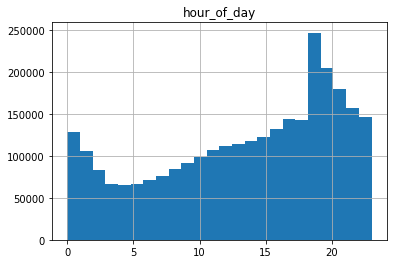

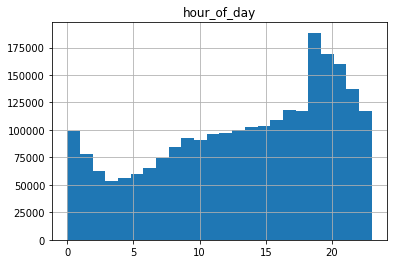

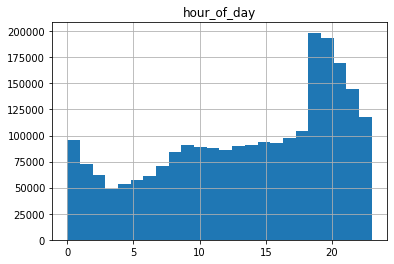

In [0]:
range_start_1 = 1543863600
range_end_1 = 1544122800
max_ts_1 = max(period_1.time)
min_ts_1 = min(period_1.time)
period_1['new_ts'] = range_start_1 + ((period_1.time - min_ts_1) / (max_ts_1 - min_ts_1)) * (range_end_1 - range_start_1)
period_1.new_ts = pd.to_datetime(period_1.new_ts, unit='s')
period_1['hour_of_day'] = period_1.new_ts.dt.hour
period_1.hist(column='hour_of_day', bins=24)

range_start_2 = 1544468400
range_end_2 = 1544727600
max_ts_2 = max(period_2.time)
min_ts_2 = min(period_2.time)
period_2['new_ts'] = range_start_2 + ((period_2.time - min_ts_2) / (max_ts_2 - min_ts_2)) * (range_end_2 - range_start_2)
period_2.new_ts = pd.to_datetime(period_2.new_ts, unit='s')
period_2['hour_of_day'] = period_2.new_ts.dt.hour
period_2.hist(column='hour_of_day', bins=24)

range_start_3 = 1545073200
range_end_3 = 1545332400
max_ts_3 = max(period_3.time)
min_ts_3 = min(period_3.time)
period_3['new_ts'] = range_start_3 + ((period_3.time - min_ts_3) / (max_ts_3 - min_ts_3)) * (range_end_3 - range_start_3)
period_3.new_ts = pd.to_datetime(period_3.new_ts, unit='s')
period_3['hour_of_day'] = period_3.new_ts.dt.hour
period_3.hist(column='hour_of_day', bins=24)

In [0]:
bids = pd.concat([period_1, period_2, period_3])
print(len(bids))
bids.head(n=100)

7656334


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,new_ts,hour_of_day
2351187,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,sporting goods,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is,2018-12-03 19:00:00.000000000,19
2351188,2351188,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,64uay,sporting goods,phone0,9631916842105263,ke,17.120.130.121,vasstdc27m7nks3,2018-12-03 19:00:00.000000000,19
2351189,2351189,3350dc181383b032a6542a61c67713f9lmevm,b3crj,mobile,phone4,9631916842105263,tz,38.153.26.26,vasstdc27m7nks3,2018-12-03 19:00:00.000000000,19
2351190,2351190,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,fagyq,sporting goods,phone1,9631916842105263,in,161.192.187.34,3skc4v2r07bneta,2018-12-03 19:00:00.000000000,19
2351191,2351191,626159dd6f2228ede002d9f9340f75b7puk8d,c2jhm,jewelry,phone119,9631916842105263,ru,114.173.200.238,5yyqy69xt3y8xdg,2018-12-03 19:00:00.000000000,19
...,...,...,...,...,...,...,...,...,...,...,...
2351282,2351282,6056cc81b7b0f4af70e7b520ece25ee7t9d8x,gja6c,mobile,phone47,9631917157894736,mu,239.9.121.44,ru5slsemfejaa3b,2018-12-03 19:00:06.000023127,19
2351283,2351283,929b75b44585b34d2b917ec181ecbcf298fr8,557vg,jewelry,phone524,9631917157894736,ir,185.31.193.59,he25dovn5y89ktm,2018-12-03 19:00:06.000023127,19
2351284,2351284,29c103503e1d6ace5626fb07a5ab0dafrtjvs,u3o4o,jewelry,phone5397,9631917210526315,th,116.59.38.240,vasstdc27m7nks3,2018-12-03 19:00:07.000026941,19
2351285,2351285,2106dd7866abbfb4e7c68067d7eb9bebflq5d,rrs3o,jewelry,phone91,9631917210526315,fr,162.118.176.195,ljnczo9xq5yxjz9,2018-12-03 19:00:07.000026941,19


In [0]:
bidders_df = pd.concat([train, test])
bid = pd.merge(bidders_df, bids, on='bidder_id', how='left')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
grouped_df = bid.groupby('bidder_id')
cols = ['bidder_id']
train_features_df = None
train_features_df = pd.DataFrame(columns=cols)
test_features_df = None
test_features_df = pd.DataFrame(columns=cols)

In [0]:
def count_values_in_range(series, time_diff):
    top_index, bottom_index, curr_count, max_count = 0, 0, 0, 0
    sorted_series = series.reset_index(drop=True)
    length = len(sorted_series)

    while top_index < length:
        if sorted_series[top_index] - sorted_series[bottom_index] < time_diff:
            top_index += 1
            curr_count += 1
        else:
            bottom_index += 1
            curr_count -= 1
        max_count = curr_count if curr_count > max_count else max_count

    return max_count

In [0]:
iteration_number = 1
for bidder_id, group in grouped_df:
    print(f"\rCurrently at bidder number {iteration_number} / {len(grouped_df.groups)}", end='')
    iteration_number += 1
    num_of_bids = len(group)
    append_dict = {'bidder_id': bidder_id}

    # 16 - Percentage of bids in 4 6-hour windows
    # the windows were chosen so that the peak activity time would be completely
    # encapsulated within a single window.
    from_23_to_5 = len(group[(23 <= group['hour_of_day']) | (group['hour_of_day'] < 5)])
    from_5_to_11 = len(group[(5 <= group['hour_of_day']) & (group['hour_of_day'] < 11)])
    from_11_to_17 = len(group[(11 <= group['hour_of_day']) & (group['hour_of_day'] < 17)])
    from_17_to_23 = len(group[(17 <= group['hour_of_day']) & (group['hour_of_day'] < 23)])
    from_23_to_5_percentage = from_23_to_5 / num_of_bids * 100
    from_5_to_11_percentage = from_5_to_11 / num_of_bids * 100
    from_11_to_17_percentage = from_11_to_17 / num_of_bids * 100
    from_17_to_23_percentage = from_17_to_23 / num_of_bids * 100
    append_dict['percentage_of_bids_23_to_5'] = from_23_to_5_percentage
    append_dict['percentage_of_bids_5_to_11'] = from_5_to_11_percentage
    append_dict['percentage_of_bids_11_to_17'] = from_11_to_17_percentage
    append_dict['percentage_of_bids_17_to_23'] = from_17_to_23_percentage

    # 10-15 - Min and mean change times of ip, device and country
    for feature in ['device', 'ip', 'country']:
        group[f'{feature}_changes'] = group[feature].apply(hash).diff() != 0
        changes_df = group[group[f'{feature}_changes']]
        change_times = pd.to_datetime(changes_df['new_ts']).diff()
        append_dict[f'mean_{feature}_change_time'] = change_times.mean().seconds
        append_dict[f'min_{feature}_change_time'] = change_times.min().seconds

    # 17 - Max bid count in 10, 30 and 60 minutes
    new_ts_series = pd.to_datetime(group['new_ts'])
    for mins in [10, 30, 60]:
        if new_ts_series.isnull().any():
            append_dict[f'max_bid_count_in_{mins}_minutes'] = 0
        else:
            append_dict[f'max_bid_count_in_{mins}_minutes'] = count_values_in_range(new_ts_series, pd.Timedelta(mins, unit='m'))

    # # 41, 42 - Max and mean consecutive bids with same parameters
    group['concat_params'] = group['country'] + '_' + group['ip'] + '_' + group['device']
    group['concat_params_changes'] = group['concat_params'].apply(hash).diff() == 0
    y = group['concat_params_changes']
    consecutive_no_change = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
    append_dict['max_consec_no_param_change'] = max(consecutive_no_change)
    mean_consec = consecutive_no_change[consecutive_no_change != 0].mean()
    append_dict['mean_consec_no_param_change'] = 0. if pd.isna(mean_consec) else mean_consec
    

    if bidder_id in train['bidder_id'].values:
        train_features_df = train_features_df.append(append_dict, ignore_index=True)
    if bidder_id in test['bidder_id'].values:
        test_features_df = test_features_df.append(append_dict, ignore_index=True)

Currently at bidder number 6 / 6713

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

Currently at bidder number 6713 / 6713

In [0]:
print(train_features_df.shape)
print(test_features_df.shape)

(2013, 16)
(4700, 16)


In [0]:
pd.isnull(train_features_df).sum()

bidder_id                        0
max_bid_count_in_10_minutes      0
max_bid_count_in_30_minutes      0
max_bid_count_in_60_minutes      0
max_consec_no_param_change       0
mean_consec_no_param_change      0
mean_country_change_time       635
mean_device_change_time        440
mean_ip_change_time            382
min_country_change_time        635
min_device_change_time         440
min_ip_change_time             382
percentage_of_bids_11_to_17      0
percentage_of_bids_17_to_23      0
percentage_of_bids_23_to_5       0
percentage_of_bids_5_to_11       0
dtype: int64

In [0]:
pd.isnull(test_features_df).sum()

bidder_id                         0
max_bid_count_in_10_minutes       0
max_bid_count_in_30_minutes       0
max_bid_count_in_60_minutes       0
max_consec_no_param_change        0
mean_consec_no_param_change       0
mean_country_change_time       1587
mean_device_change_time        1111
mean_ip_change_time             955
min_country_change_time        1587
min_device_change_time         1111
min_ip_change_time              955
percentage_of_bids_11_to_17       0
percentage_of_bids_17_to_23       0
percentage_of_bids_23_to_5        0
percentage_of_bids_5_to_11        0
dtype: int64

In [0]:
# NaN values in these features will be filled with their respective bot/human median value
time_features = ['mean_ip_change_time', 'min_ip_change_time',
                 'mean_device_change_time', 'min_device_change_time',
                 'mean_country_change_time', 'min_country_change_time']
train_features_df = train_features_df.merge(bidders_df, on='bidder_id')
bots_df = train_features_df[train_features_df['outcome'] == 1]
humans_df = train_features_df[train_features_df['outcome'] == 0]

In [0]:
cleaned_train_output_df = None
cleaned_train_output_df = pd.DataFrame()
for df in [bots_df, humans_df]:
    na_fill_dict = {feature: df[feature].median() for feature in time_features}
    df = df.fillna(value=na_fill_dict)
    cleaned_train_output_df = cleaned_train_output_df.append(df)


In [0]:
cleaned_train_output_df.drop('outcome', axis=1, inplace=True)

In [0]:
cleaned_test_output_df = None
cleaned_test_output_df = pd.DataFrame()
test_features_df = test_features_df.fillna(value={'mean_consec_no_param_change': 0})
na_fill_dict = {feature: test_features_df[feature].median() for feature in time_features}
test_features_df = test_features_df.fillna(value=na_fill_dict)
cleaned_test_output_df = cleaned_test_output_df.append(test_features_df)

In [0]:
cleaned_train_output_df.head()

,bidder_id,max_bid_count_in_10_minutes,max_bid_count_in_30_minutes,max_bid_count_in_60_minutes,max_consec_no_param_change,mean_consec_no_param_change,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,address,payment_account
17,022ac3a7ce986049d9a4bede83ccf9ddctvg6,102.0,192.0,276.0,13.0,1.561798,431.0,1786.0,178.0,0.0,0.0,0.0,38.388626,4.318062,18.062138,39.231174,c57c64adcc43ce50d99f184d87981d87yz2di,57aec2c76d2db80cf61c2543d15ef9f82tplj
33,041d869edcadf595b90e3b5248903183pn754,13.0,26.0,37.0,3.0,1.137931,1879.0,1127.0,956.0,1.0,0.0,0.0,22.557905,36.858006,25.780463,14.803625,a3d2de7675556553a5f08e4c88d2c228elshv,a3d2de7675556553a5f08e4c88d2c228fyp15
54,060ac64ff78ae62e9bc697192cebea333760p,14.0,28.0,41.0,60.0,15.529762,8854.0,8854.0,8500.0,147.0,147.0,147.0,11.340206,57.731959,24.226804,6.701031,9c584eb89824bca6f66b93b30db19849f462o,d7a69a3308ae300a133dc62dc9189504u6vt0
55,061690ceb6004807b7906968bf382dfcbve7y,10.0,15.0,26.0,2.0,1.083333,10647.0,2453.0,2635.0,35.0,0.0,1.0,44.444444,23.842593,8.796296,22.916667,a3d2de7675556553a5f08e4c88d2c228mmua8,a3d2de7675556553a5f08e4c88d2c2288o042
63,06ddad46112881df154e3bda0e90fe880r57n,177.0,177.0,177.0,0.0,0.000000,1330.0,561.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000,a6ed42b522b643dd393b71b9ace4a6e9lfelg,a3d2de7675556553a5f08e4c88d2c228i8nnd


In [0]:
cleaned_train_output_df.to_csv("/content/drive/Shared drives/DS Workshop/data/tom_newest_features_train.csv")
cleaned_test_output_df.to_csv("/content/drive/Shared drives/DS Workshop/data/tom_newest_features_test.csv")

In [0]:
print("train shape",cleaned_train_output_df.shape)
print("test shape ", cleaned_test_output_df.shape)

train shape (2013, 18)
test shape  (4700, 16)


In [0]:
X_train = pd.read_csv('/content/drive/Shared drives/DS Workshop/data/X_Train4.csv')
X_test = pd.read_csv('/content/drive/Shared drives/DS Workshop/data/X_test4.csv')

In [0]:
train_features_df = pd.read_csv("/content/drive/Shared drives/DS Workshop/data/tom_newest_features_train.csv")
test_features_df = pd.read_csv("/content/drive/Shared drives/DS Workshop/data/tom_newest_features_test.csv")

In [0]:
X_train = pd.merge(X_train,train_features_df,on='bidder_id', how='left')
X_test = pd.merge(X_test,test_features_df,on='bidder_id', how='left')

In [0]:
X_train.shape
X_train.isna().sum()

bidder_id                                        0
Unnamed: 0_x                                     0
Unnamed: 0.1                                     0
outcome                                          0
payment_account_prefix_same_as_address_prefix    0
                                                ..
percentage_of_bids_17_to_23                      0
percentage_of_bids_23_to_5                       0
percentage_of_bids_5_to_11                       0
address                                          0
payment_account                                  0
Length: 274, dtype: int64

In [0]:
X_test.shape
X_test.isna().sum()

bidder_id                                        0
Unnamed: 0_x                                     0
payment_account_prefix_same_as_address_prefix    0
address_infrequent_address                       0
address_rare_address                             0
                                                ..
min_ip_change_time                               0
percentage_of_bids_11_to_17                      0
percentage_of_bids_17_to_23                      0
percentage_of_bids_23_to_5                       0
percentage_of_bids_5_to_11                       0
Length: 269, dtype: int64

In [0]:
X_train.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/X_Train5.csv')
X_test.to_csv('/content/drive/Shared drives/DS Workshop/data/Tom Data Files/X_test5.csv')